In [2]:
import pandas as pd
titanic=pd.read_csv("C:/Users/user/Downloads/titanic.csv")
titanic.shape

(891, 12)

## Centeral Tendency

In [3]:
#Central tendency is all about finding the “typical” or “central” value in a dataset—basically, where the data tends 
#to cluster.It’s a key concept in statistics and helps summarize large amounts of data with a single representative value. 
#nunique,unique and value_counts
titanic.Embarked.unique()     #".unique" includes missings in the list of returned values 

array(['S', 'C', 'Q', nan], dtype=object)

In [4]:
titanic.Embarked.value_counts()     #".nunique" and ".value_counts" ignore those.

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [5]:
titanic.Pclass.unique()

array([3, 1, 2])

In [6]:
titanic.Pclass.median()

3.0

In [7]:
titanic.Age.mean()

np.float64(29.69911764705882)

In [8]:
import numpy as np
a=np.array([1,2,np.nan])
b=pd.Series(a)                   #In case of series, missings are ignored     
np.mean(a)                       #In case of arrays, a missing value results in the whole result to be missing

np.float64(nan)

In [9]:
np.mean(b)           # In case of series, missings are ignored

np.float64(1.5)

In [10]:
a.mean()           # In case of arrays, a missing value results in the whole result to be missing

np.float64(nan)

In [11]:
b.mean()

np.float64(1.5)

In [12]:
np.percentile(b,50)         # A percentile tells you the value below which a given percentage of data falls.(Meian)

np.float64(nan)

In [13]:
np.percentile(b.dropna(),50)    # In the dataframe of b it removes all the nan values and return the 50th percentile median value.

np.float64(1.5)

## Variability

In [14]:
# range(as a tuple)
titanic.Age.min(), titanic.Age.max()

(0.42, 80.0)

In [15]:
# Variance and standard deviation .var and .std
titanic.Age.var()

211.0191247463081

In [16]:
titanic.Age.std()

14.526497332334044

## Distributions

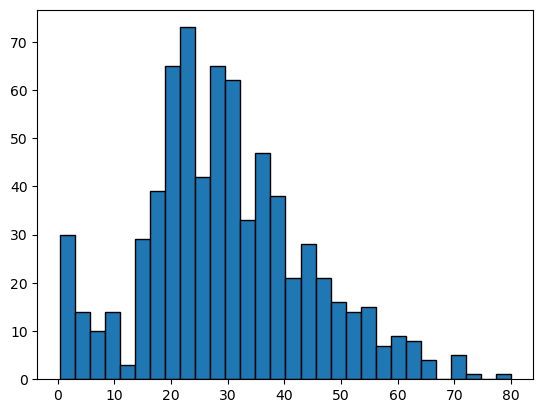

In [17]:
# The standard way to plot distributions is to use matplotlib’s hist function.
import matplotlib.pyplot as plt
plt.hist(titanic.Age.dropna(),bins=30,edgecolor="k")
plt.show()

- A density plot (or KDE plot – Kernel Density Estimate) shows the distribution of a dataset, similar to a histogram, but smoother.
- It helps visualize where values are conce

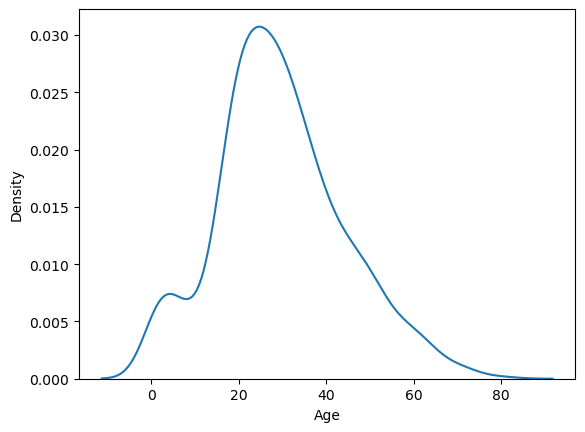

In [18]:
import seaborn as sns
sns.kdeplot(titanic.Age)    
plt.show()

- Important: Pandas Series has .quantile(), but no .percentile() method. That’s why for percentiles you use NumPy.
- A quantile is a way of splitting data into equal parts.

- 0.25 quantile = 25th percentile = the value below which 25% of the data lies.

- 0.50 quantile = 50th percentile = median.

- 0.75 quantile = 75th percentile.

In [21]:
# first quantile
titanic.Age.quantile(0.25)

np.float64(20.125)

- That while series methods automatically remove missings, one has to do this manually for np.percentile.

In [22]:
# first and the third quantile
np.percentile(titanic.Age.dropna(),[25,75])

array([20.125, 38.   ])

- Pareto Ratio--How much more a small group owns or contributes compared to their share of the population.
- If the top 20% of people have 80% of the money,Pareto ratio = 80 ÷ 20 = 4.
- Pareto ratio = (share of outcome controlled by top group) ÷ (their population share).

In [ ]:
#re=real earnings(income,adjusted for inflation).
#78=the year 1978.
#So,re78 means the real earnings of a person in the year 1978. (re78-income variable)

In [29]:
treatment=pd.read_csv("C:/Users/user/Downloads/treatment.csv.bz2",sep="\t")
treatment.re78.head(5)

0     9930.05
1    24909.50
2     7506.15
3      289.79
4     4056.49
Name: re78, dtype: float64

In [28]:
print(treatment.columns)

Index(['treat\tage\teduc\tethn\tmarried\tre74\tre75\tre78\tu74\tu75'], dtype='object')


In [30]:
total=treatment.re78.sum()    #Total income across all these cases
total

np.float64(54843856.0104)

- the total income share, earned by the richest 30%. We can use np.percentile or np.quantile to compute the threshold between the lower 70% and upper 30% by

In [31]:
threshold=np.percentile(treatment.re78, 70)  # top 30th percentile
threshold

np.float64(26599.1)

In [32]:
top30=treatment.re78[treatment.re78 > threshold].sum()
top30

np.float64(30274684.2)

In [34]:
share=top30/total
share

np.float64(0.5520159668251451)

## Exercise 7.1

In [43]:
income=treatment["re78"]           # Stores all the income (from columnre78)
total_income=income.sum()          # Add all the income to know the total
for i in range(99,50,-1):          # Loop downs 99 to 50 like 99,98,97...,52,51,50
    threshold=np.percentile(treatment.re78,i)      
    share=income[income>threshold].sum()/total      
    if 100*share>i:
        print(i,share)
        break

63 0.6474562618876845


4. Finds the income value at the i-th percentile.Example: if i = 90, 
this gives the income where 90% of people earn less, 10% earn more.
5. Takes only the people earning above the cutoff.Adds their incomes and divides by total income.
So share = fraction of total income earned by the richest (100 - i)%.
6. Converts share to a percentage.
Checks if the richest (100 - i)% earn more than i% of income.
Example: if richest 20% earn more than 80% of income → condition is true.
7. print(i, share) and break Prints the result (the percentile i and income share).
Stops the loop once the condition is satisfied.